<a href="https://colab.research.google.com/github/guillaumebdf/QM/blob/main/parts2_and_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import random
import plotly.graph_objects as go
import plotly.express as px
!pip install chart_studio
import chart_studio.plotly as py


     |████████████████████████████████| 64 kB 1.6 MB/s 


In [ ]:
import chart_studio

In [ ]:
mydf = pd.read_csv("meat_CO2_v4.csv")
mydf

,country,meat_kg_pc,CO2_tonnes_pc,population
0,Afghanistan,8.59,0.3124,37171922
1,Albania,47.51,1.5757,2866376
2,Algeria,18.06,3.5346,42228415
3,Angola,23.49,0.6754,30809787
4,Antigua and Barbuda,72.04,4.3952,96282
...,...,...,...,...
164,Venezuela,40.94,2.9754,28887117
165,Vietnam,63.33,2.6126,95545959
166,Yemen,16.86,0.3275,28498683
167,Zambia,13.12,0.3575,17351714


In [ ]:
df2 = pd.read_csv("food_footprints.csv")
df2.set_index("food", inplace = True)
df2

,GHG_emissions_per_kilo,proteins_per_100g_in_g
food,,
beef_herd,99.48,28.69
lamb_and_mutton,39.72,18.24
beef_dairy,33.30,28.69
prawns,26.87,16.87
pork,12.31,19.31
poultry,9.87,25.00
eggs,4.67,12.52
rice,4.45,13.35
tofu,3.16,12.95


In [ ]:
df2.describe()

,GHG_emissions_per_kilo,proteins_per_100g_in_g
count,16.000000,16.000000
mean,15.287500,15.310625
std,25.675019,7.923815
min,0.430000,2.550000
25%,1.472500,11.350000
50%,3.805000,15.110000
75%,15.950000,18.687500
max,99.480000,28.690000


In [ ]:
meat = [df2.loc['beef_herd']['GHG_emissions_per_kilo'], df2.loc['lamb_and_mutton']['GHG_emissions_per_kilo'], df2.loc['pork']['GHG_emissions_per_kilo'], df2.loc['poultry']['GHG_emissions_per_kilo']]
mean_meat = 0
for i in range(len(meat)):
  mean_meat = mean_meat + meat[i]
mean_meat = mean_meat/len(meat)
print(mean_meat)

vegan = [df2.loc['rice']['GHG_emissions_per_kilo'], df2.loc['tofu']['GHG_emissions_per_kilo'], df2.loc['oatmeal']['GHG_emissions_per_kilo'], df2.loc['wheat_and_rye']['GHG_emissions_per_kilo'], df2.loc['barley']['GHG_emissions_per_kilo'], df2.loc['peas']['GHG_emissions_per_kilo'], df2.loc['soymilk']['GHG_emissions_per_kilo'], df2.loc['nuts']['GHG_emissions_per_kilo']]
mean_vegan = 0
for i in range(len(vegan)):
  mean_vegan = mean_vegan + vegan[i]
mean_vegan = mean_vegan/len(vegan)
print(mean_vegan)

40.345
1.90375


In [ ]:
meat_prot = (df2.loc['beef_herd']['proteins_per_100g_in_g']+ df2.loc['lamb_and_mutton']['proteins_per_100g_in_g']+ df2.loc['pork']['proteins_per_100g_in_g']+ df2.loc['poultry']['proteins_per_100g_in_g'])/len(meat)
vegan_prot = (df2.loc['rice']['proteins_per_100g_in_g']+ df2.loc['tofu']['proteins_per_100g_in_g']+ df2.loc['oatmeal']['proteins_per_100g_in_g']+ df2.loc['wheat_and_rye']['proteins_per_100g_in_g']+ df2.loc['barley']['proteins_per_100g_in_g']+ df2.loc['peas']['proteins_per_100g_in_g']+ df2.loc['soymilk']['proteins_per_100g_in_g']+ df2.loc['nuts']['proteins_per_100g_in_g'])/len(vegan)
print(meat_prot)
print(vegan_prot)


22.81
11.54125


In [ ]:
diff = meat_prot/vegan_prot
diff

1.9763890393154986

In [ ]:
mydf.set_index("country", inplace = True)

In [ ]:
mydf

,meat_kg_pc,CO2_tonnes_pc,population
country,,,
Afghanistan,8.59,0.3124,37171922
Albania,47.51,1.5757,2866376
Algeria,18.06,3.5346,42228415
Angola,23.49,0.6754,30809787
Antigua and Barbuda,72.04,4.3952,96282
...,...,...,...
Venezuela,40.94,2.9754,28887117
Vietnam,63.33,2.6126,95545959
Yemen,16.86,0.3275,28498683


In [ ]:
mean_meat_cons = 0
for i in range(len(mydf)):
  mean_meat_cons = mean_meat_cons + mydf.meat_kg_pc[i]
mean_meat_cons = mean_meat_cons/len(mydf)
print(mean_meat_cons)

mean_meat_without_china = 0
for i in range(len(mydf)):
  mean_meat_without_china = mean_meat_without_china + mydf.meat_kg_pc[i]
mean_meat_without_china = mean_meat_without_china - mydf.loc["China"]["meat_kg_pc"]
mean_meat_without_china = mean_meat_without_china/(len(mydf)-1)
print(mean_meat_without_china)

mean_meat_without_us_co = 0
for i in range(len(mydf)):
  mean_meat_without_us_co = mean_meat_without_us_co + mydf.meat_kg_pc[i]
mean_meat_without_us_co = mean_meat_without_us_co - mydf.loc["Canada"]["meat_kg_pc"]
mean_meat_without_us_co = mean_meat_without_us_co - mydf.loc["United States"]["meat_kg_pc"]
mean_meat_without_us_co = mean_meat_without_us_co - mydf.loc["Australia"]["meat_kg_pc"]
mean_meat_without_us_co = mean_meat_without_us_co/(len(mydf)-3)
print(mean_meat_without_us_co)
 

48.88337278106511
48.8136904761905
47.78897590361448


In [ ]:
average_emissions_meat_pc = mean_meat_cons * mean_meat
average_emissions_vegan_pc = mean_meat_cons * mean_vegan * diff
average_emissions_no_china = mean_meat_without_china * mean_meat
average_emissions_no_us_co = mean_meat_without_us_co * mean_meat

https://ourworldindata.org/grapher/projected-population-by-country

In [ ]:
popdf = pd.read_csv("world_pop_2015_to_2050.csv")
popdf

,year,population_world
0,2015,7380117870
1,2016,7464344232
2,2017,7548182589
3,2018,7631091110
4,2019,7713468203
5,2020,7794798725
6,2021,7874965730
7,2022,7953952572
8,2023,8031800338
9,2024,8108605253


In [ ]:
popdf.describe()

,year,population_world
count,36.000000,3.600000e+01
mean,2032.500000,8.663848e+09
std,10.535654,7.124806e+08
min,2015.000000,7.380118e+09
25%,2023.750000,8.089404e+09
50%,2032.500000,8.721156e+09
75%,2041.250000,9.272186e+09
max,2050.000000,9.735034e+09


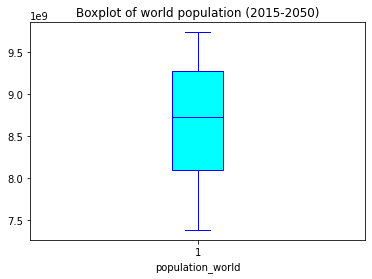

In [ ]:
def box_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp


fig, ax = plt.subplots()
box_plot(popdf.population_world, 'blue', 'cyan')
ax.set_title("Boxplot of world population (2015-2050)")
ax.set_xlabel("population_world")
plt.show()

In [ ]:
popdf2 = pd.read_csv("country_populations_v2.csv")
popdf2

,year,population_aus,ppulation_canada,population_china,population_us
0,2015,23932499,36026668,1406847868,320878312
1,2016,24262710,36382942,1414049353,323015992
2,2017,24584619,36732091,1421021794,325084758
3,2018,24898153,37074558,1427647789,327096263
4,2019,25203200,37411038,1433783692,329064917
5,2020,25499881,37742157,1439323774,331002647
6,2021,25788217,38067913,1444216102,332915074
7,2022,26068793,38388416,1448471404,334805268
8,2023,26343073,38704479,1452127674,336679231
9,2024,26612912,39017093,1455254862,338542562


In [ ]:
popdf2.describe()

,year,population_aus,ppulation_canada,population_china,population_us
count,36.000000,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01
mean,2032.500000,2.865773e+07,4.129415e+07,1.443318e+09,3.528091e+08
std,10.535654,2.635863e+06,2.910429e+06,1.930516e+07,1.789390e+07
min,2015.000000,2.393250e+07,3.602667e+07,1.402405e+09,3.208783e+08
25%,2023.750000,2.654545e+07,3.893894e+07,1.428896e+09,3.380767e+08
50%,2032.500000,2.880223e+07,4.155243e+07,1.448751e+09,3.542492e+08
75%,2041.250000,3.085688e+07,4.377666e+07,1.460340e+09,3.683540e+08
max,2050.000000,3.281411e+07,4.566945e+07,1.464418e+09,3.794191e+08


In [ ]:
meat_projections = average_emissions_meat_pc * popdf.population_world
vegan_projections = average_emissions_vegan_pc * popdf.population_world

popdf["population2"] = popdf.population_world - popdf2.population_china
popdf["population3"] = popdf.population_world - (popdf2.population_aus + popdf2.ppulation_canada + popdf2.population_us)
projections2 = average_emissions_no_china * popdf.population2 + popdf2.population_china * average_emissions_vegan_pc
projections3 = average_emissions_no_us_co * popdf.population3 + (popdf2.population_aus + popdf2.ppulation_canada + popdf2.population_us) * average_emissions_vegan_pc

In [ ]:
popdf["meat_projections"] = meat_projections
popdf["vegan_projections"] = vegan_projections

popdf

,year,population_world,population2,population3,meat_projections,vegan_projections
0,2015,7380117870,5973270002,6999280391,1.455507e+13,1.357397e+12
1,2016,7464344232,6050294879,7080682588,1.472118e+13,1.372888e+12
2,2017,7548182589,6127160795,7161781121,1.488652e+13,1.388308e+12
3,2018,7631091110,6203443321,7242022136,1.505004e+13,1.403557e+12
4,2019,7713468203,6279684511,7321789048,1.521250e+13,1.418709e+12
5,2020,7794798725,6355474951,7400554040,1.537290e+13,1.433667e+12
6,2021,7874965730,6430749628,7478194526,1.553100e+13,1.448412e+12
7,2022,7953952572,6505481168,7554690095,1.568678e+13,1.462940e+12
8,2023,8031800338,6579672664,7630073555,1.584031e+13,1.477258e+12
9,2024,8108605253,6653350391,7704432686,1.599179e+13,1.491385e+12


In [ ]:
cumul_meat_emissions = []
y = 0
for i in range(len(popdf)):
  y = y + popdf.meat_projections[i]
  cumul_meat_emissions.append(y)
popdf["cumul_meat_emissions"] = cumul_meat_emissions

cumul_vegan_emissions = []
y = 0
for i in range(7):
  y = y + popdf.meat_projections[i]
  cumul_vegan_emissions.append(y)
for i in range(7,len(popdf)):
  y = y + popdf.vegan_projections[i]
  cumul_vegan_emissions.append(y)
popdf["cumul_vegan_emissions"] = cumul_vegan_emissions

cumul_2_emissions = []
y = 0
for i in range(7):
  y = y + popdf.meat_projections[i]
  cumul_2_emissions.append(y)
for i in range(7,len(popdf)):
  y = y + projections2[i]
  cumul_2_emissions.append(y)
popdf["cumul_2_emissions"] = cumul_2_emissions

cumul_3_emissions = []
y = 0
for i in range(7):
  y = y + popdf.meat_projections[i]
  cumul_3_emissions.append(y)
for i in range(7,len(popdf)):
  y = y + projections3[i]
  cumul_3_emissions.append(y)
popdf["cumul_3_emissions"] = cumul_3_emissions
popdf

,year,population_world,population2,population3,meat_projections,vegan_projections,cumul_meat_emissions,cumul_vegan_emissions,cumul_2_emissions,cumul_3_emissions
0,2015,7380117870,5973270002,6999280391,1.455507e+13,1.357397e+12,1.455507e+13,1.455507e+13,1.455507e+13,1.455507e+13
1,2016,7464344232,6050294879,7080682588,1.472118e+13,1.372888e+12,2.927624e+13,2.927624e+13,2.927624e+13,2.927624e+13
2,2017,7548182589,6127160795,7161781121,1.488652e+13,1.388308e+12,4.416277e+13,4.416277e+13,4.416277e+13,4.416277e+13
3,2018,7631091110,6203443321,7242022136,1.505004e+13,1.403557e+12,5.921280e+13,5.921280e+13,5.921280e+13,5.921280e+13
4,2019,7713468203,6279684511,7321789048,1.521250e+13,1.418709e+12,7.442530e+13,7.442530e+13,7.442530e+13,7.442530e+13
5,2020,7794798725,6355474951,7400554040,1.537290e+13,1.433667e+12,8.979820e+13,8.979820e+13,8.979820e+13,8.979820e+13
6,2021,7874965730,6430749628,7478194526,1.553100e+13,1.448412e+12,1.053292e+14,1.053292e+14,1.053292e+14,1.053292e+14
7,2022,7953952572,6505481168,7554690095,1.568678e+13,1.462940e+12,1.210160e+14,1.067921e+14,1.184074e+14,1.199684e+14
8,2023,8031800338,6579672664,7630073555,1.584031e+13,1.477258e+12,1.368563e+14,1.082694e+14,1.316325e+14,1.347535e+14
9,2024,8108605253,6653350391,7704432686,1.599179e+13,1.491385e+12,1.528481e+14,1.097608e+14,1.450031e+14,1.496823e+14


Text(0, 0.5, 'CO2_emissions')

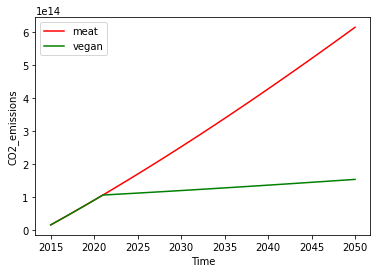

In [ ]:

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(popdf.year, popdf.cumul_meat_emissions, 'r', label="meat")
ax.plot(popdf.year, popdf.cumul_vegan_emissions, 'g',label="vegan")

ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("CO2_emissions")

In [ ]:

fig = go.Figure()


fig.add_trace(go.Scatter(y=popdf.meat_projections, x=popdf.year,
                    mode='lines',
                    name='unchanged'))


fig.add_trace(go.Scatter(y=popdf.vegan_projections, x=popdf.year,
                    mode='lines',
                    name='vegan'))


fig.update_layout(
    title = "Emissions (2015 to 2050) due to a global unchanged diet and a global vegan diet from 2022 onwards",
    xaxis_title = "Years",
    yaxis_title = "CO2eq emitted (kg)")

fig.show()

In [ ]:
username = 'guillaumebdf'
api_key = 're2yb4JuUZOiqoh3JrFg'
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [ ]:
py.plot(fig, filename = 'vis1', auto_open=True)

'https://plotly.com/~guillaumebdf/1/'

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(y=popdf.cumul_vegan_emissions, x=popdf.year,
                    mode='lines',
                    name='vegan'))

fig.add_trace(go.Scatter(y=popdf.cumul_meat_emissions, x=popdf.year,
                    mode='lines',
                    name='unchanged'))

fig.update_layout(
    title = "Cumulated emissions (2015 to 2050) due to a global unchanged diet and a global vegan diet from 2022 onwards",
    xaxis_title = "Years",
    yaxis_title = "CO2eq emitted (kg)")

fig.show()

In [ ]:
username = 'guillaumebdf'
api_key = 're2yb4JuUZOiqoh3JrFg'
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
py.plot(fig, filename = 'vis2', auto_open=True)
#not working but idk why?!!!!!!!!!!!
#import plotly.io as pio
#pio.write_html(fig,"/content/drive/My Drive/parts2_and_3.ipynb.html",auto_open=True)


'https://plotly.com/~guillaumebdf/4/'

In [ ]:
fig = go.Figure()


fig.add_trace(go.Scatter(y=popdf.meat_projections, x=popdf.year,
                    mode='lines',
                    name='unchanged'))


fig.add_trace(go.Scatter(y=projections2, x=popdf.year,
                    mode='lines',
                    name='vegan china'))


fig.add_trace(go.Scatter(y=projections3, x=popdf.year,
                    mode='lines',
                    name='vegan US, AUS and CAN'))

fig.update_layout(
    title = "Emissions (2015 to 2050) for different scenarios of diets from 2022 onwards",
    xaxis_title = "Years",
    yaxis_title = "CO2eq emitted (kg)")

fig.show()

In [ ]:
username = 'guillaumebdf'
api_key = 're2yb4JuUZOiqoh3JrFg'
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)


In [ ]:
py.plot(fig, filename = 'vis3', auto_open=True)

'https://plotly.com/~guillaumebdf/10/'

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(y=popdf.cumul_meat_emissions, x=popdf.year,
                    mode='lines',
                    name='unchanged'))


fig.add_trace(go.Scatter(y=popdf.cumul_2_emissions, x=popdf.year,
                    mode='lines',
                    name='vegan china'))


fig.add_trace(go.Scatter(y=popdf.cumul_3_emissions, x=popdf.year,
                    mode='lines',
                    name='vegan US, AUS and CAN'))

fig.update_layout(
    title = "Cumulated emissions (2015 to 2050) for different scenarios of diets from 2022 onwards",
    xaxis_title = "Years",
    yaxis_title = "CO2eq emitted (kg)")

fig.show()

In [ ]:
username = 'guillaumebdf'
api_key = 're2yb4JuUZOiqoh3JrFg'
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
py.plot(fig, filename = 'vis4', auto_open=True)

'https://plotly.com/~guillaumebdf/15/'

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(y=popdf.cumul_vegan_emissions, x=popdf.year,
                    mode='lines',
                    name='vegan'))

fig.add_trace(go.Scatter(y=popdf.cumul_meat_emissions, x=popdf.year,
                    mode='lines',
                    name='unchanged'))


fig.add_trace(go.Scatter(y=popdf.cumul_2_emissions, x=popdf.year,
                    mode='lines',
                    name='vegan china'))


fig.add_trace(go.Scatter(y=popdf.cumul_3_emissions, x=popdf.year,
                    mode='lines',
                    name='vegan US, AUS and CAN'))

fig.update_layout(
    title = "Cumulated emissions (2015 to 2050) for different scenarios of diets from 2022 onwards",
    xaxis_title = "Years",
    yaxis_title = "CO2eq emitted (kg)")

fig.show()

In [ ]:
username = 'guillaumebdf'
api_key = 're2yb4JuUZOiqoh3JrFg'
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
py.plot(fig, filename = 'vis5', auto_open=True)

'https://plotly.com/~guillaumebdf/18/'

In [ ]:
data = [['cop21_objective', 61650000000000],['vegan_planet', popdf.iloc[35, 7]], ['vegan_china', popdf.iloc[35, 8]], ['vegan_US_AUS_CAN', popdf.iloc[35, 9]],['unchanged_diet', popdf.iloc[35, 6]]]
newdf = pd.DataFrame(data, columns = ['scenario', 'cumulated_emissions'])   

In [ ]:
color_discrete_map = {'cop21_objective':'rgb(135,206,250)',
              'vegan_china': 'rgb(85,107,47)',
              'vegan_planet': 'rgb(0,128,0)',
              'vegan_US_AUS_CAN': 'rgb(128,128,0)',
              'unchanged_diet':'rgb(128,0,0)'}

fig = px.bar(newdf, x='scenario', y='cumulated_emissions', color='scenario',
           color_discrete_sequence=px.colors.qualitative.Alphabet,
           color_discrete_map=color_discrete_map, width=900, height=550
          )
fig.add_shape(type='line',
                x0=-0.5,
                y0=61650000000000,
                x1=5,
                y1=61650000000000,
                line=dict(color='rgb(135,206,250)'),
                xref='x',
                yref='y'
)

fig.update_layout(
    #title = "Barcharts of cumulated emissions of CO2 equivalents (from 2015 to 2050) for different scenarios of diets from 2022 onwards",
    xaxis_title = "Different scenarios and emissions objective as set by the COP 21 (Paris Agreements)",
    yaxis_title = "CO2eq emitted (kg)")
fig.show()

In [ ]:
username = 'guillaumebdf'
api_key = 're2yb4JuUZOiqoh3JrFg'
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
py.plot(fig, filename = 'vis6', auto_open=True)

'https://plotly.com/~guillaumebdf/29/'